#  Original and Mask Images Prepare

In [52]:
from PIL import Image
import os

import numpy as np

def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img=img[:,:,0]
        return img
    else:
        return img

def pre_images(resize_shape,path):
    dirs=os.listdir(path)
    sizes=np.zeros([len(dirs),2])
    images=img=Image.open(path+dirs[0])
    sizes[0,:]=images.size
    images=(images.resize((resize_shape),Image.ANTIALIAS))
    images=convert_one_channel(np.asarray(images))
    for i in range (1,len(dirs)):
        #img=Image.open(path+dirs[i])
        img=Image.open(path+str(i)+'.png')
        sizes[i,:]=img.size
        img=img.resize((resize_shape),Image.ANTIALIAS)
        img=convert_one_channel(np.asarray(img))
        images=np.concatenate((images,img))
    images=np.reshape(images,(len(dirs),resize_shape[0],resize_shape[1],1))
    return images,sizes

In [53]:
#!git clone https://github.com/ImagingYeditepe/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

! git clone https://github.com/RobertSmithers/3DTeethSegmentation.git

fatal: destination path '3DTeethSegmentation' already exists and is not an empty directory.


In [54]:
import sys
sys.path.append("/content/3DTeethSegmentation")

In [55]:
%cd /content/3DTeethSegmentation

/content/3DTeethSegmentation


In [56]:


path1 = '/content/3DTeethSegmentation/original_img/'
path2 = '/content/3DTeethSegmentation/masked_img/'

og_img, size1 = pre_images((512, 512), path1)
mask_img, size2 = pre_images((512, 512), path2)

83


(-0.5, 511.5, 511.5, -0.5)

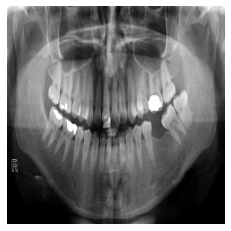

In [59]:
og_img=np.float32(og_img/255)
mask_img=np.float32(mask_img/255)


x_train=og_img[:117,:,:,:]
y_train=mask_img[:117,:,:,:]
x_test=og_img[117:,:,:,:]
y_test=mask_img[117:,:,:,:]

#Check
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,116)
print(random_number)

#Checking data X and Y matching
plt.imshow(x_train[random_number,:,:,0], cmap = 'gray')
plt.axis('off')

83


(-0.5, 511.5, 511.5, -0.5)

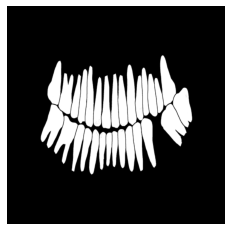

In [60]:
#Checking data X and Y matching
print(random_number)
plt.imshow(y_train[random_number,:,:,0], cmap = 'gray')
plt.axis('off')